In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model  import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# Read the data set

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv")

In [3]:
 data.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [4]:
data

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [5]:
data.shape

(30, 17)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [7]:
data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


It seems that there are no missing valuses in our data.let's see the distribution of data :

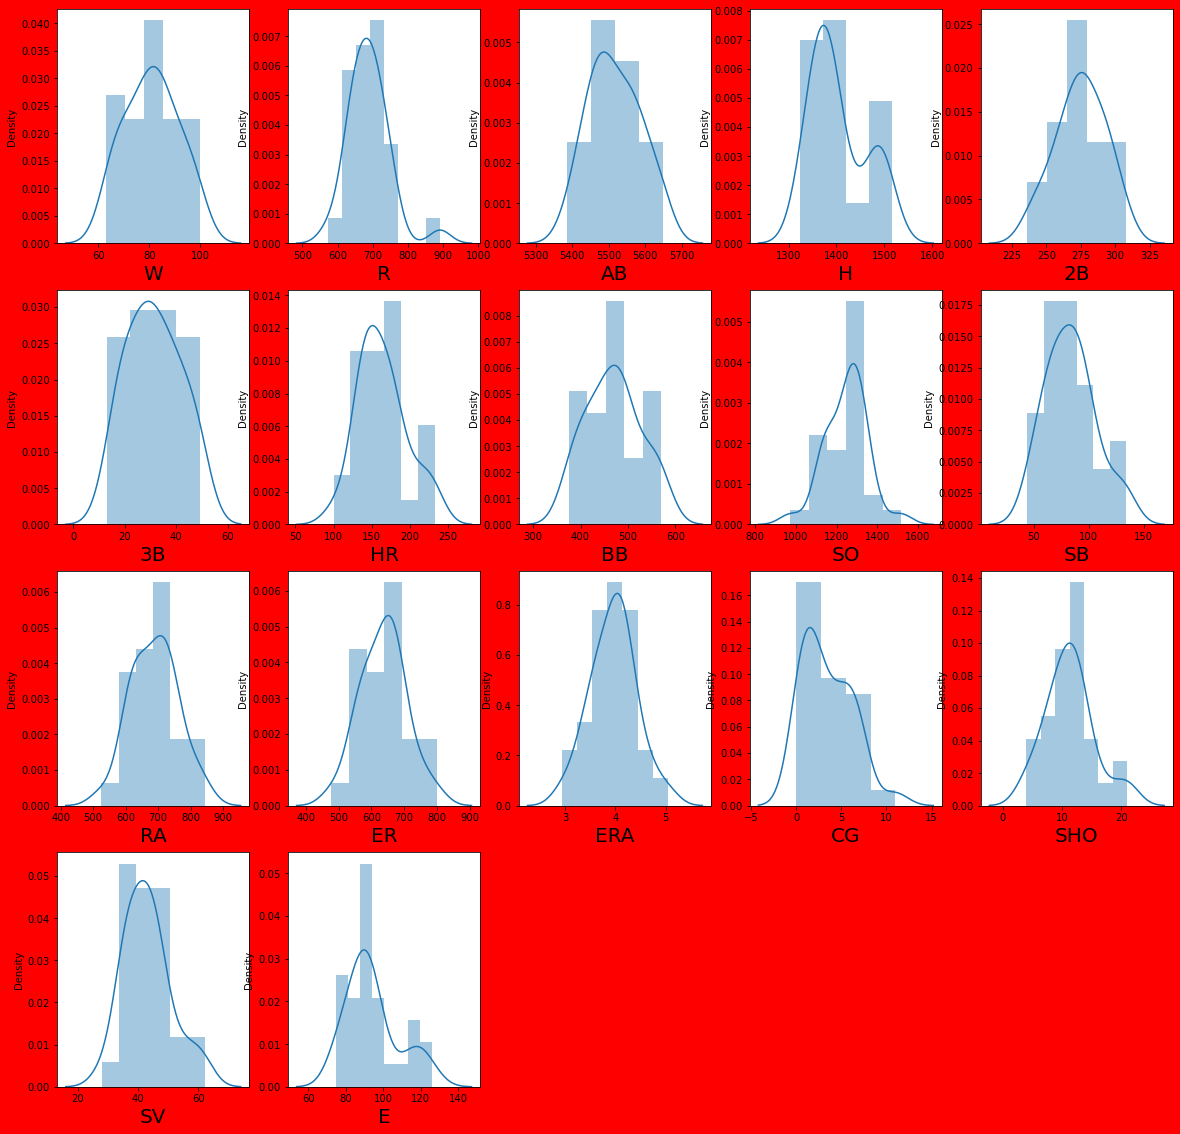

In [8]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25),facecolor='red')
plotnumber = 1


for column in data:
    if plotnumber<=17 :  # as there are 17 columns in the data
        ax= plt.subplot(5,5,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
        
    plotnumber+=1
plt.show()

The data distribution looks decent enough and there doesn't seem to be any skewness.Great let's go ahead.
let's observe the relationship between independent variables and dependent variable.

In [9]:
# Divide data set into features and label
y=data['W']
x=data.drop(columns=['W'])

In [10]:
y

0      95
1      83
2      81
3      76
4      74
5      93
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64

In [11]:
x

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


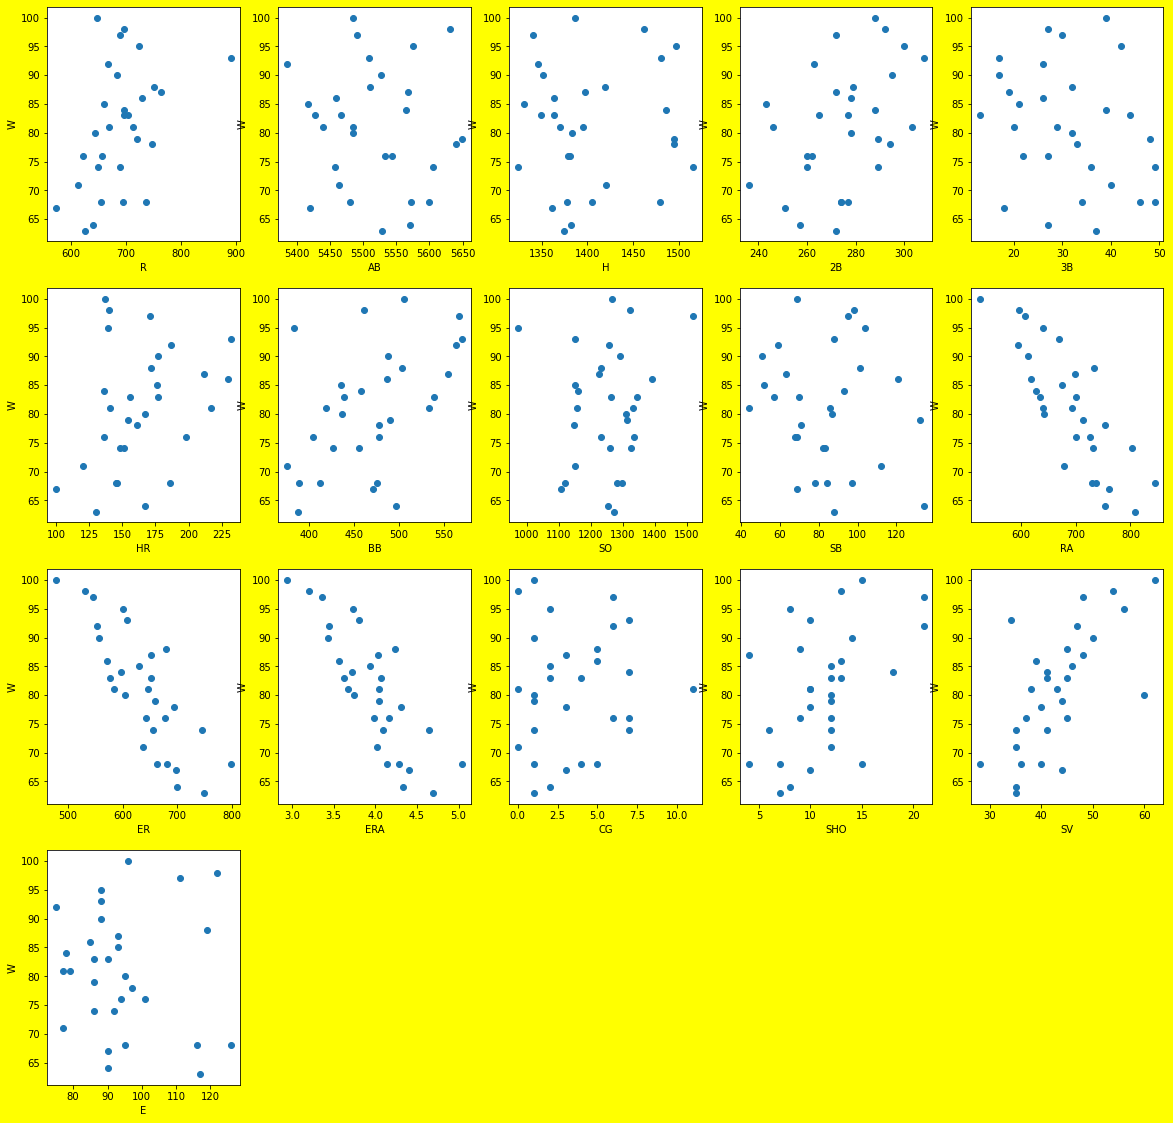

In [12]:
# Visualizing relationship
plt.figure(figsize=(20,25),facecolor='yellow')
plotnumber = 1


for column in x:
    if plotnumber<=17 :  # as there are 17 columns in the data
        ax= plt.subplot(5,5,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=10)
        plt.ylabel('W',fontsize=10)
        
    plotnumber+=1
plt.show()


In [13]:
# Data scaling.formula Z=(x-mean)/std
scaler = StandardScaler()
x_scaled=scaler.fit_transform(x)

In [14]:
x_scaled

array([[ 0.61907797,  0.84773126,  1.66368512,  1.42017307,  1.04119304,
        -0.7872986 , -1.53490242, -2.69762957,  0.91388329, -0.66623393,
        -0.50511008, -0.50695519, -0.5398062 , -0.81462859,  1.67160651,
        -0.46146963],
       [ 0.13443166, -0.71109353, -0.97068076,  0.12740339,  1.23580856,
        -0.24396668, -0.5365919 ,  0.15487844, -0.60182558,  0.16597077,
         0.24892985,  0.25459752, -0.5398062 ,  0.1728    ,  0.24987932,
        -0.60719689],
       [-0.33290586, -1.1152333 , -0.15189137,  1.58879521, -0.22380785,
        -0.7233772 ,  1.13914361, -0.89398189,  0.11144918, -0.68033909,
        -0.75162313, -0.64134684,  2.77264091, -0.32091429, -0.65485616,
        -1.11724227],
       [-1.14641931,  0.24152162, -0.40108814, -0.82812203, -0.41842337,
        -0.8831807 , -1.16053598, -0.16860185, -0.69098493,  0.18007593,
         0.10392217,  0.05301004,  1.3004422 , -0.56777144, -0.78410408,
         0.48575751],
       [ 0.01327008,  1.28073815,  1

In [15]:
# split data into train and test. Model will be build on training data tested on test data.
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=348)
y_train.head()

15    100
11     86
4      74
12     85
24     63
Name: W, dtype: int64

# Model instantiating and training

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

# predict the chance of win given feature

In [18]:
data.tail(2)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


In [19]:
# since we have already fit the scaler,you can transform the data
print('chance of win is :  ',regression.predict(scaler.transform([['650','5457','1324','260','36','148','426','1327','82','731','655','4.09','1','6','41','92']])))

chance of win is :   [75.1868952]


# you can save the model and later you can use it for prediction

In [20]:
import pickle

In [21]:
# saving the model to the local file system
pickle.dump(regression,open('reg_model','wb'))

In [22]:
#prediction using the saved model
loaded_model=pickle.load(open('reg_model','rb'))
a=loaded_model.predict(scaler.transform([['650','5457','1324','260','36','148','426','1327','82','731','655','4.09','1','6','41','92']]))
a

array([75.1868952])

In [23]:
scaler.transform(scaler.transform([['650','5457','1324','260','36','148','426','1327','82','731','655','4.09','1','6','41','92']]))

array([[-11.92394546, -79.63172906, -25.00776853, -15.48858677,
         -3.00122955,  -5.24580525,  -8.37633052, -12.22782521,
         -3.7253837 ,  -9.69913557,  -9.21604132,  -8.1910338 ,
         -1.61004162,  -3.11245958,  -5.60080106,  -6.88585669]])

# Let's check how well model fits on train data

In [24]:
# Adjust R2 score
regression.score(x_train,y_train)

0.9687969317509287

# Let's check how well model fits on test data

In [25]:
regression.score(x_test,y_test)

0.259337682904495

# Let's plot visualize

In [26]:
y_pred=regression.predict(x_test)

In [27]:
y_pred

array([ 91.52398158,  84.73068706,  78.19851814,  78.80704391,
        57.9130671 , 105.2632438 ,  85.9046416 ,  78.90617752])

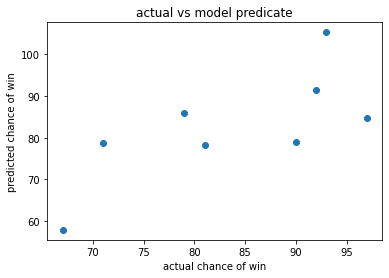

In [28]:
plt.scatter(y_test,y_pred)
plt.xlabel("actual chance of win")
plt.ylabel("predicted chance of win")
plt.title('actual vs model predicate')
plt.show()

# Model evaluation

In [29]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [30]:
y_pred =regression.predict(x_test)

In [31]:
#MAE
mean_absolute_error(y_test,y_pred)

7.8378122391877305

In [32]:
#MSE
mean_squared_error(y_test,y_pred)

77.90841747948343

In [33]:
#RMSE
np.sqrt(mean_squared_error(y_test,y_pred))

8.826574504273072

# you have succesfully complete building linear Regression model

# Regularization

In [34]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

In [35]:
lasscv= LassoCV(alphas=None,max_iter=100,normalize=True)
lasscv.fit(x_train,y_train)

LassoCV(max_iter=100, normalize=True)

In [36]:
# best alpha parameter
alpha=lasscv.alpha_
alpha

0.24970636220853143

In [37]:
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.24970636220853143)

In [38]:
lasso_reg.score(x_test,y_test)

0.8957350184648306

# using  ridge regression model

In [39]:
ridgecv=RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [40]:
ridgecv.alpha_

0.09099999999999998

In [41]:
ridge_model=Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.09099999999999998)

In [42]:
ridge_model.score(x_test,y_test)

0.8883369603629967

# Data Preprocessing (Analysis(EDA))

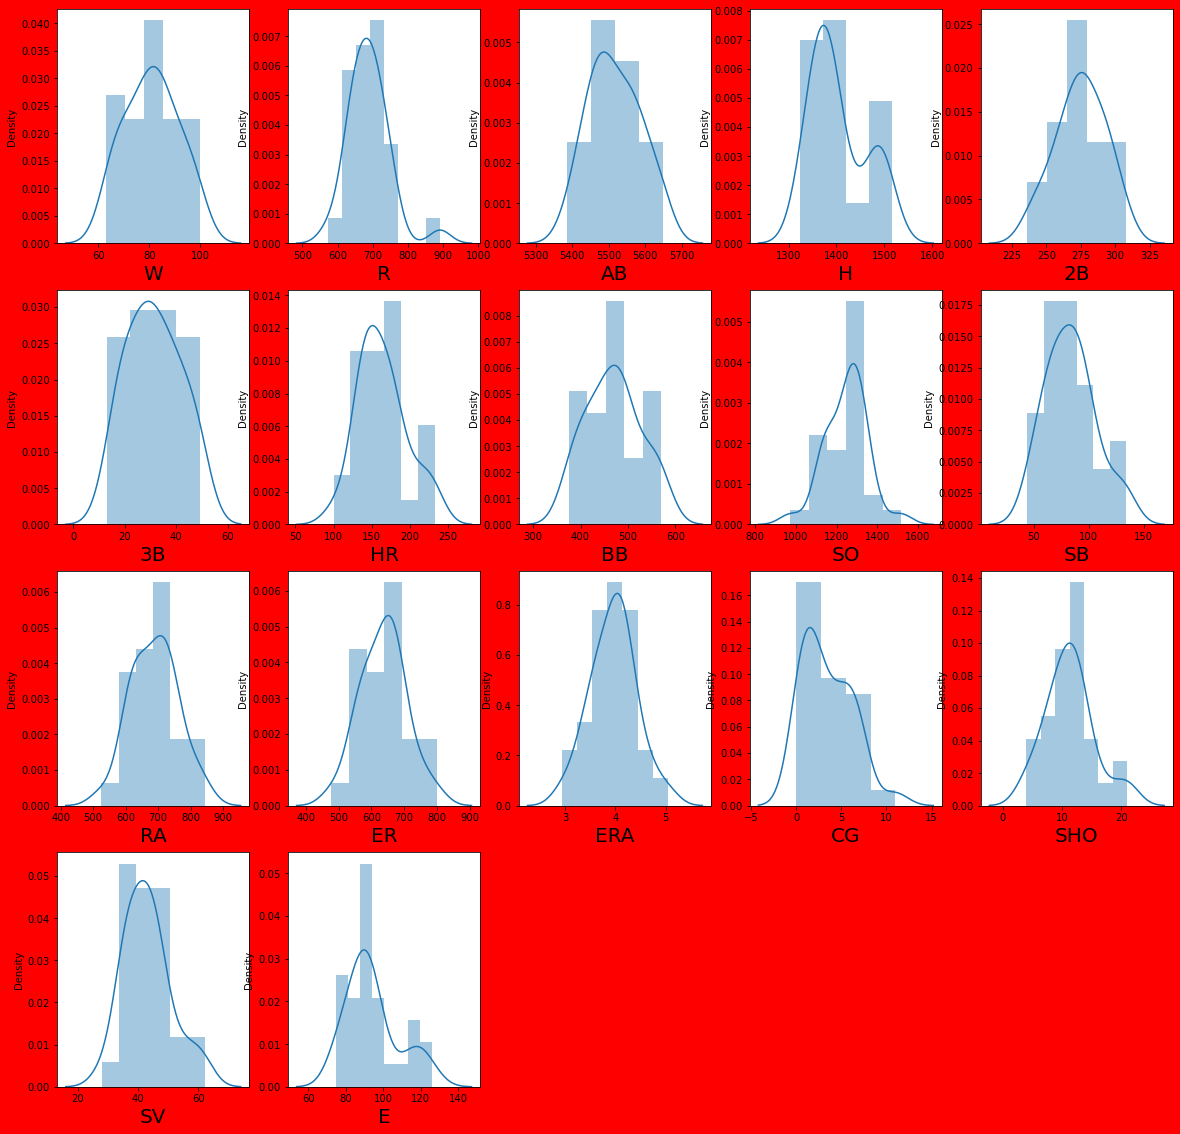

In [43]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25),facecolor='red')
plotnumber = 1


for column in data:
    if plotnumber<=17 :  # as there are 17 columns in the data
        ax= plt.subplot(5,5,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
        
    plotnumber+=1
plt.show()

We can see tere is some skewness in the data,let's deal with the data.


In [44]:
df_features=data.drop('W',axis=1)

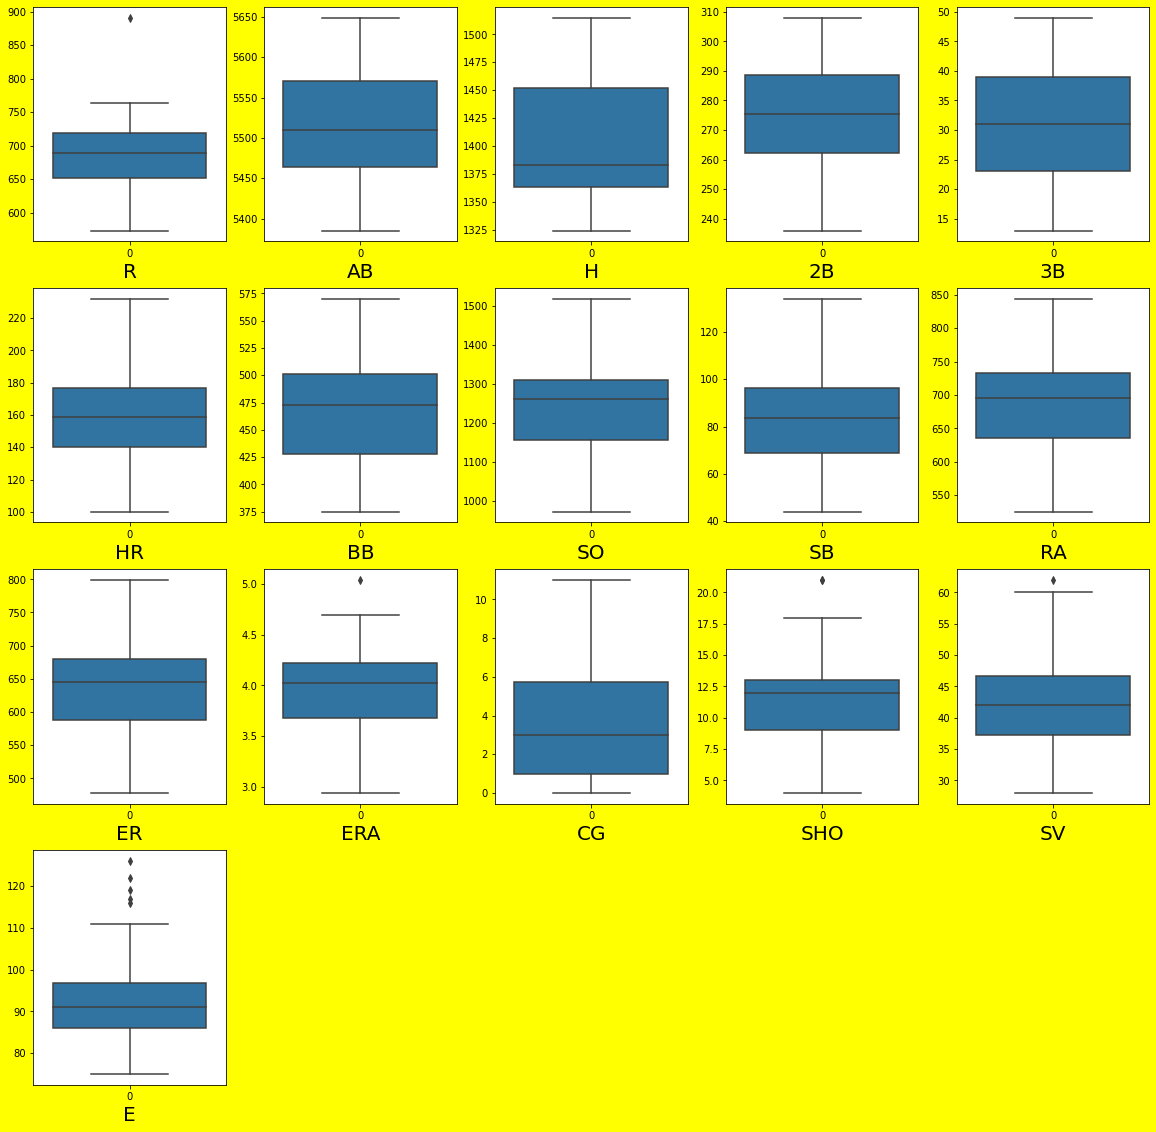

In [45]:
#Visualize the outliers using box plot
plt.figure(figsize=(20,25),facecolor='yellow')
graph = 1


for column in df_features:
    if graph<=17 :  # as there are 17 columns in the data
        plt.subplot(5,5,graph)
        ax = sns.boxplot(data=df_features[column])
        plt.xlabel(column,fontsize=20)
        
        
    graph+=1
plt.show()
        


It seems that there is skewness in 'R','ERA','SHO','SV','E'.

In [46]:
data.shape

(30, 17)

# Finding relationship.Wde want to keep only those features which have relationship with label.

In [47]:
x=data.drop(columns=['W'])
y=data['W']

Before we fit our data to a model. Let's visualize the relationship between our independent variables and categories.

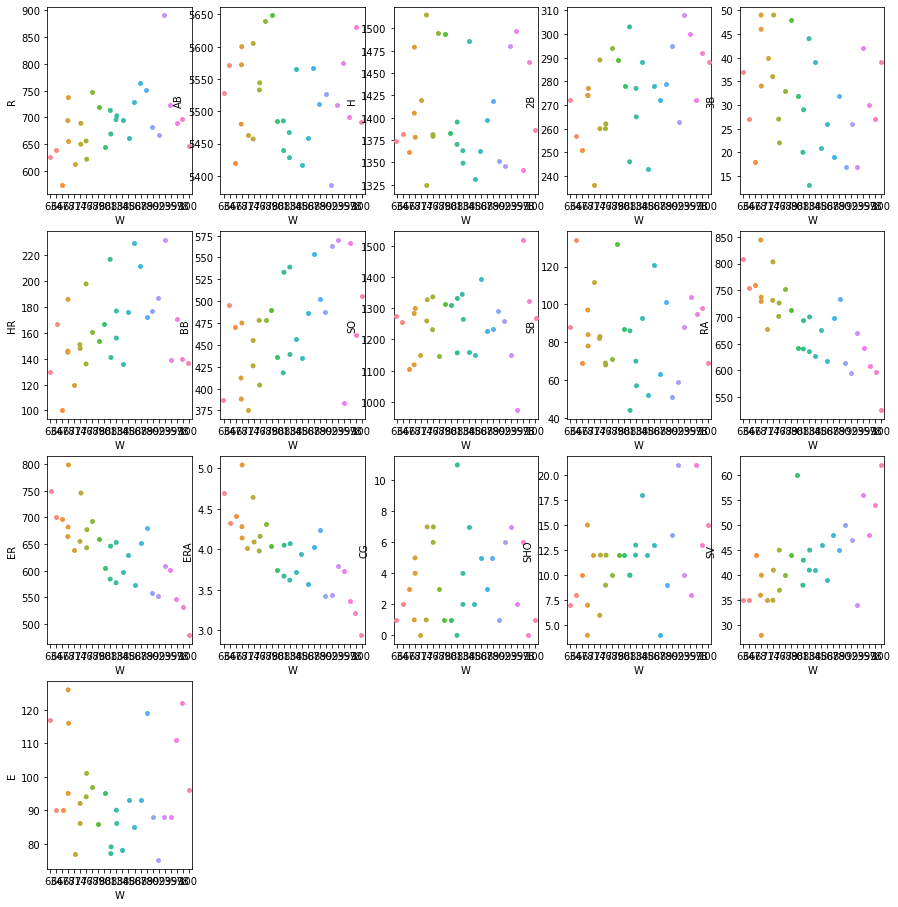

In [48]:
#Let's see how features are related to class
plt.figure(figsize=(15,20))
plotnumber = 1


for column in x:
    if plotnumber<=17 :  # as there are 17 columns in the data
        ax=plt.subplot(5,5,plotnumber)
        sns.stripplot(y,x[column])
    plotnumber+=1
plt.show()

# Check multicollinearity problem.Find if one feature is dependent on another feathure.

In [49]:
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)

This is how our data looks now after scaling.Great,now we will check for multicollinearity usin VIF(variance inflation factor)

In [50]:
x_scaled.shape

(30, 16)

In [51]:
#Finding variance inflation factor in each scaled column i.e. x_scaled.shape[1] (1/1-R2)

In [52]:
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif["features"]=x.columns

#let's check the values
vif

,vif,features
0,11.522370,R
1,13.311532,AB
2,10.070668,H
3,4.019297,2B
4,3.294146,3B
5,10.079902,HR
6,3.806098,BB
7,2.652401,SO
8,2.102684,SB
9,191.839155,RA


This is  multicollinearity problem. 

In [53]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state=355)

In [54]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

let's see how our model performs on the test data set.

In [55]:
y_pred =log_reg.predict(x_test)

In [56]:
y_pred

array([68, 68, 84, 83, 83, 83, 74, 87], dtype=int64)

In [57]:
#model accuracy 
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.0

In [58]:
#Confusion matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]], dtype=int64)

# 

# similarly you can manually calculate recall/precision/F1score

In [59]:
from sklearn.metrics import classification_report

In [60]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          68       0.00      0.00      0.00       0.0
          71       0.00      0.00      0.00       1.0
          74       0.00      0.00      0.00       1.0
          81       0.00      0.00      0.00       1.0
          83       0.00      0.00      0.00       0.0
          84       0.00      0.00      0.00       0.0
          86       0.00      0.00      0.00       1.0
          87       0.00      0.00      0.00       0.0
          88       0.00      0.00      0.00       1.0
          90       0.00      0.00      0.00       1.0
          93       0.00      0.00      0.00       1.0
          95       0.00      0.00      0.00       1.0

    accuracy                           0.00       8.0
   macro avg       0.00      0.00      0.00       8.0
weighted avg       0.00      0.00      0.00       8.0



In [61]:
data

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


# KNN

In [62]:
from sklearn.neighbors import KNeighborsClassifier

In [63]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv")

In [64]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [65]:
# Print summary
print('shape    ------>',df.shape)
print('Each column and data type and its count','\n')
print(df.info())

shape    ------> (30, 17)
Each column and data type and its count 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB
None


In [66]:
# Dataframe statistics
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [67]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

seems no other columns have nulls.it's safe to proceed.

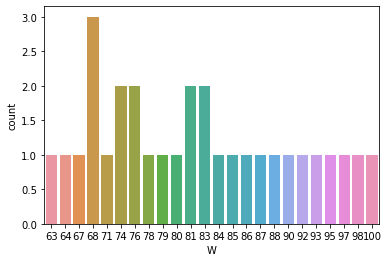

In [68]:
# plot each class frequency
sns.countplot(x='W',data=df)
plt.show()


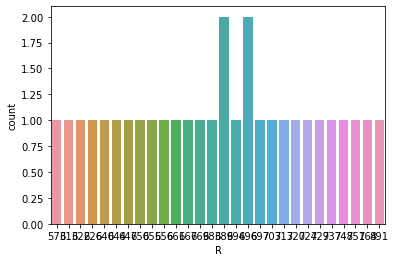

In [69]:
sns.countplot(x='R',data=df)
plt.show()

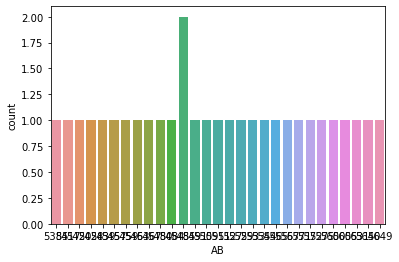

In [70]:
sns.countplot(x='AB',data=df)
plt.show()

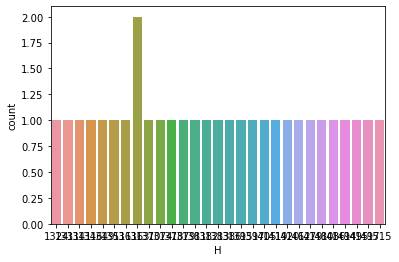

In [71]:
sns.countplot(x='H',data=df)
plt.show()

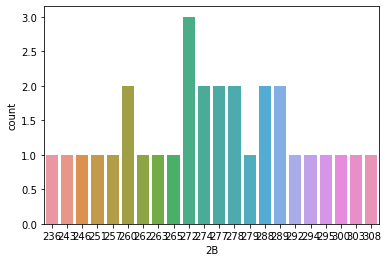

In [72]:
sns.countplot(x='2B',data=df)
plt.show()

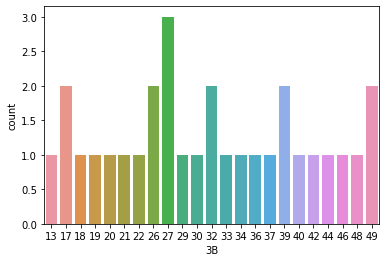

In [73]:
sns.countplot(x='3B',data=df)
plt.show()

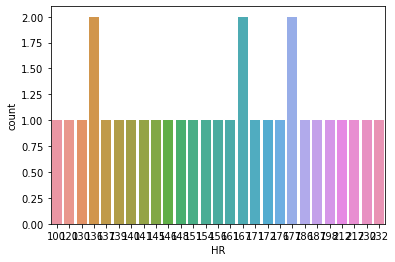

In [74]:
sns.countplot(x='HR',data=df)
plt.show()

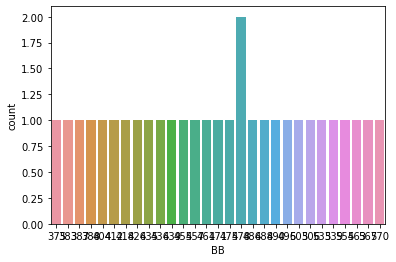

In [75]:
sns.countplot(x='BB',data=df)
plt.show()

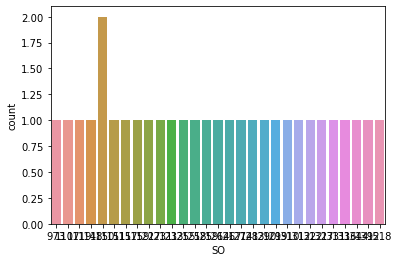

In [76]:
sns.countplot(x='SO',data=df)
plt.show()

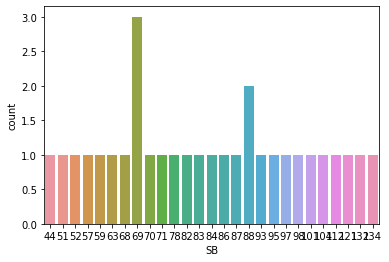

In [77]:
sns.countplot(x='SB',data=df)
plt.show()

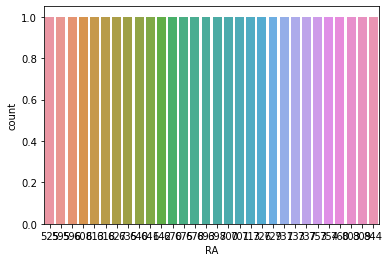

In [78]:
sns.countplot(x='RA',data=df)
plt.show()

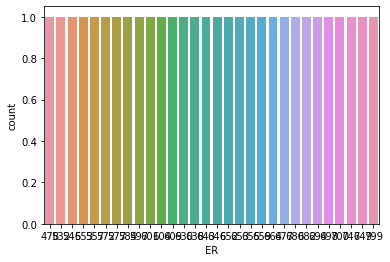

In [79]:
sns.countplot(x='ER',data=df)
plt.show()

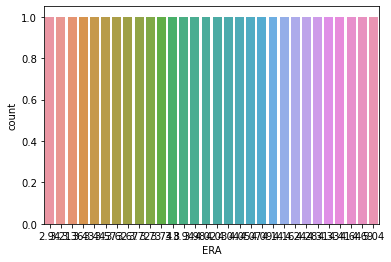

In [80]:
sns.countplot(x='ERA',data=df)
plt.show()

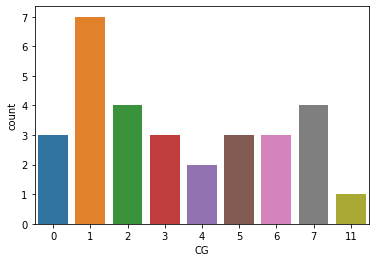

In [81]:
sns.countplot(x='CG',data=df)
plt.show()

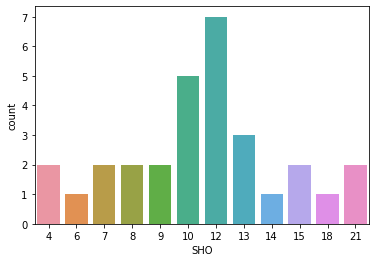

In [82]:
sns.countplot(x='SHO',data=df)
plt.show()

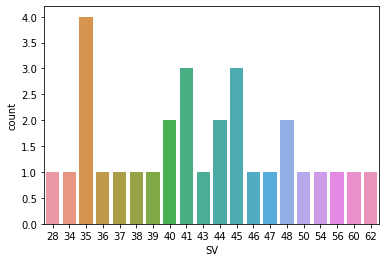

In [83]:
sns.countplot(x='SV',data=df)
plt.show()

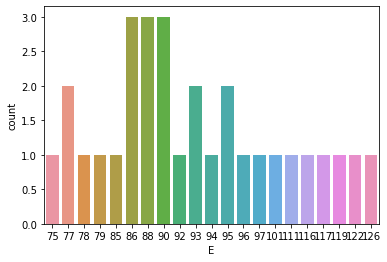

In [84]:
sns.countplot(x='E',data=df)
plt.show()

In [85]:
df.shape

(30, 17)

# Using selectKBest feature selection method

selrctkBest use f_classif function to find best features,where f_classif uses ANOVA test.

In [86]:
from sklearn.feature_selection import SelectKBest,f_classif

In [87]:
x=df.drop('W',axis=1)
y=df.W

In [88]:
best_features = SelectKBest(score_func=f_classif,k=8)
fit = best_features.fit(x,y)
df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(x.columns)

# concatenate dataframe
feature_scores =pd.concat([df_columns,df_scores],axis=1)
feature_scores.columns = ['feature_Name','score']  # name output columns
print(feature_scores.nlargest(8,'score')) # print 17 best features

   feature_Name     score
0             R  4.325471
8            SB  3.145176
14           SV  2.966365
9            RA  2.420967
15            E  2.403946
11          ERA  1.665038
10           ER  1.574876
1            AB  1.552727


# Model Building

In [89]:
new_x = df[['R','SB','SV','RA','E','ERA','ER','AB']]

In [90]:
new_x

,R,SB,SV,RA,E,ERA,ER,AB
0,724,104,56,641,88,3.73,601,5575
1,696,70,45,700,86,4.07,653,5467
2,669,86,38,640,79,3.67,584,5439
3,622,68,37,701,101,3.98,643,5533
4,689,83,35,803,86,4.64,746,5605
5,891,88,34,670,88,3.80,609,5509
6,764,63,48,698,93,4.03,652,5567
7,713,44,43,693,77,4.05,646,5485
8,644,87,60,642,95,3.74,604,5485
9,748,71,40,753,97,4.31,694,5640


In [91]:
scalar=StandardScaler()
x_scalar=scalar.fit_transform(new_x)

In [92]:
# Building model to test unexposed data
x_train,x_test,y_train,y_test = train_test_split(x_scalar,y,test_size=0.25,random_state=355)

In [93]:
# Write one function  and call as many as times to check accuracy_score of different models
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred = clf.predict(x_train)
        print("\n==================Train Result==================")
        print(f"Accuracy score : {accuracy_score(y_train,y_pred)*100:0.2f}%")
              
    elif train==False:
              pred=clf.predict(x_test)
              
              
              print("\n==================Train Result==================")
              print(f"Accuracy score : {accuracy_score(y_train,y_pred)*100:0.2f}%")
              
              print('\n \n Test clssaification Report \n',classification_report(y_test,pred,digits=2)) ## Model confidence/accuracy

In [94]:
# Initiate KNeighborsClassifier
knn=KNeighborsClassifier()

# Model Training
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [95]:
# Call the function and pass dataset to check train and test score
metric_score(knn,x_train,x_test,y_train,y_test,train=True)    # This is for training score
metric_score(knn,x_train,x_test,y_train,y_test,train=False)  #This is for test score


==================Train Result==================
Accuracy score : 27.27%

==================Train Result==================


UnboundLocalError: local variable 'y_pred' referenced before assignment

# cross validation

Cross validation score to check if the model overfitting

In [96]:
from sklearn.model_selection import KFold,cross_val_score

In [97]:
cross_val_score(knn,x_scalar,y,cv=3)

array([0., 0., 0.])

In [98]:
cross_val_score(KNeighborsClassifier(),x_scalar,y,cv=3).mean()

0.0


# hyperparameter Tuning

In [99]:
from sklearn.model_selection import GridSearchCV

In [100]:
param_grid = {'algorithm' : ['kd_tree','brute'],
              'leaf_size' : [3,5,6,7,8],
               'n_neighbors' : [3,5,7,9,11,13]
             }

In [101]:
gridsearch=GridSearchCV(estimator=knn,cv=3,param_grid=param_grid)

In [102]:
gridsearch.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [3, 5, 6, 7, 8],
                         'n_neighbors': [3, 5, 7, 9, 11, 13]})